In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from matplotlib.colors import ListedColormap
import seaborn as sns
# import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree


from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# import plotly
# plotly.__version__

In [4]:
contraceptive_ori = pd.read_csv("contraceptive_for_students.csv")
contraceptive_ori.head(10)


,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


# 1. EDA and Data Transformation

## The EDA of the comparison between the contraception between the education level of men and weomen. 

Using the contraceptive data, our goal was to determine which features of the data are best for predicting the type of contraceptive method a woman used. We also wanted to create a prediction method that would give a high prediction accuracy score (using all the features given). We first explored the data using visual aids to help us see the relationship of the features with each other and the response variable: contraceptive method.

There wasn't any null values in the dataframe. 

Below is the EDA of the level of education of women with the size of the different types of contraception methods. In order to get this relation, we first had to group the education level in the wife and compare it to the number of different types of contraception. We used the function groupby to group the two columns of wife education and contraception and then applied the size function to get the group count for each subset. 

For the bar chart between women’s education level and the type of contraceptive used, we were able to find that women were more likely to not use contraceptives for most of the education level except the women who received high level of education. From them, they were more likely to use contraceptive as most of them used short term contraceptive and second to most were using short term. However, for the remaining other education level they were second most likely to use long term contraception and had least amount of women to use short term contraceptive.


In [10]:
contraceptive_ori = pd.read_csv("contraceptive_for_students.csv")
contraceptive_ori.head(5)
#1473 rows × 10 columns

#only_contra = contraceptive_ori[contraceptive_ori['contraceptive'] !=1]
#only_contra.head(5) #844 rows × 10 columns

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [11]:
female_ed = contraceptive_ori.groupby(["wife_education", "contraceptive"]).size().unstack()
#female_ed = female_ed.fillna(0)
female_ed = female_ed.reset_index()
female_ed = pd.DataFrame({"Wife Education Lv" : ["Low", "midLow", "midHigh", "High"],"No Use":female_ed[1], "Short term": female_ed[2], "Long term": female_ed[3]})
female_ed

,Wife Education Lv,No Use,Short term,Long term
0,Low,103,9,40
1,midLow,176,37,121
2,midHigh,175,80,155
3,High,175,207,195


Text(0.5, 1.0, 'Contraceptive Usage over female education level')

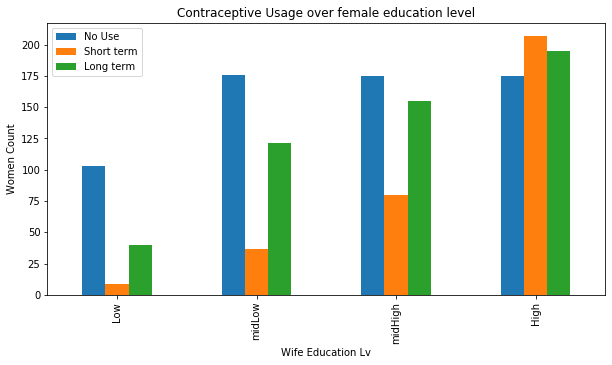

In [14]:
female_ed.plot.bar(x="Wife Education Lv", figsize = (10, 5))
plt.ylabel("Women Count")
plt.title("Contraceptive Usage over female education level")


## The EDA of the relation between the contraception and women's religion. 

For the EDA, we decided to create a visualization of the correlation between the wife's religion and the type of contraception. We used bar chart as the visualization to represent the correlation and we were able to find a trend that women with Islam religion were more like to not use contraceptive. Following the demographic of women not using contraceptive, Islam women were more likely to use long term contraception than the short term. For the women in the group of non-Islam religion, all of the demonstrated similar number for no use, short term, and long term use of contraceptive. 

In [15]:
female_reli = contraceptive_ori.groupby(['wife_religion', 'contraceptive']).size().unstack()
female_reli = female_reli.fillna(0)
female_reli = female_reli.reset_index()
female_reli['wife_religion'] = female_reli['wife_religion'].replace({1:"Islam", 0:"Non Islam"})
female_reli = pd.DataFrame({"Has Religion":female_reli['wife_religion'], "No use": female_reli[1], "Short Term":female_reli[2], "Long Term":female_reli[3]})
female_reli

,Has Religion,No use,Short Term,Long Term
0,Non Islam,75,76,69
1,Islam,554,257,442


Text(0.5, 1.0, "Variation in the use of Contraceptive over the Wife's Religion")

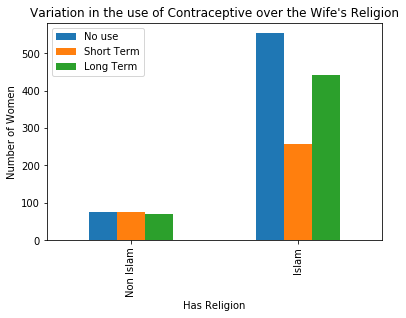

In [16]:
female_reli.plot.bar(x="Has Religion")
plt.ylabel("Number of Women")
plt.title("Variation in the use of Contraceptive over the Wife's Religion")

## The EDA of the Relation between the contraception over women in different age group. 

For getting the relationship between how the method of contraception being used for women in different age groups, we first grouped the columns by the women's age and the size of the different types of contraception. 

From the given bar chart, it demonstrates how many women are using either the long term, short term contraception or no contraception over the different age group. 

We created a new data frame that organized the data table into a cleaner version as we also renamed the columns to No use, short term, and long term for describing the type of contraception use for women of different age. 

By visualizing and narrowing down the dataset, we were able to observe a relative trend in the relation between the wife's age and the method of contraception used. 

In [7]:
female_age = contraceptive_ori.groupby(["wife_age", "contraceptive"]).size().unstack()
female_age = female_age.fillna(0)
female_age = female_age.reset_index()
female_age = pd.DataFrame({"Wife Age":female_age["wife_age"], "No use": female_age[1], "Long term" : female_age[2], "Short term": female_age[3]})
female_age.head(10)

,Wife Age,No use,Long term,Short term
0,16,2.0,0.0,1.0
1,17,2.0,1.0,5.0
2,18,5.0,1.0,1.0
3,19,9.0,1.0,8.0
4,20,17.0,2.0,9.0
5,21,19.0,6.0,23.0
6,22,27.0,6.0,26.0
7,23,21.0,8.0,15.0
8,24,24.0,12.0,25.0
9,25,33.0,11.0,36.0


Text(0.5, 1.0, 'Variation of use of Contraceptive over Women in different Age group')

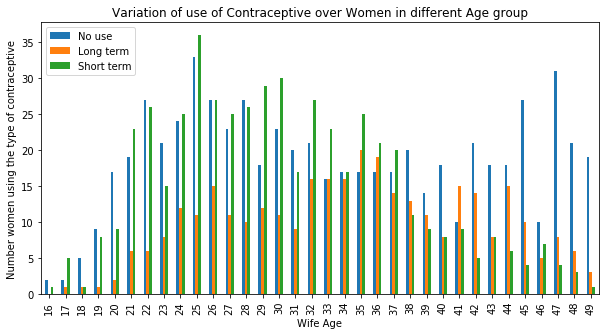

In [8]:
female_age.plot.bar(x="Wife Age", figsize=(10,5))
plt.ylabel("Number women using the type of contraceptive")
plt.title("Variation of use of Contraceptive over Women in different Age group")

# PCA/ Scree Plot EDA

We wanted to see how the scree plot would look using this data; however, as it will be explained in the project narrative, we did not get much help in identifying relevant patterns using the principal compenents and scree plot.

In [54]:
#center data
contra_centered = contraceptive_ori - np.mean(contraceptive_ori)
u, s, vt = np.linalg.svd(contra_centered, full_matrices = False)


#total variance of dataset
tot_var_compute_fromdata = sum(np.var(contra_centered, axis = 0))


#variance explained by nth pc
variance_explained_pc1 = (np.sum(np.square(s[:1]))/contra_centered.shape[0]) / tot_var_compute_fromdata
    #0.8932780515421039
variance_explained_pc2 = (np.sum(np.square(s[:2]))/contra_centered.shape[0]) / tot_var_compute_fromdata
    #0.945240475840454
variance_explained_pc3 = (np.sum(np.square(s[:3]))/contra_centered.shape[0]) / tot_var_compute_fromdata
    #0.9682765714961606
    
### PC Data
pc_tot = contra_centered @ vt.T

pc1 = pc_tot[0]
pc2 = pc_tot[1]

([<matplotlib.axis.XTick at 0x7f040584c4d0>,
 <a list of 10 Text xticklabel objects>)

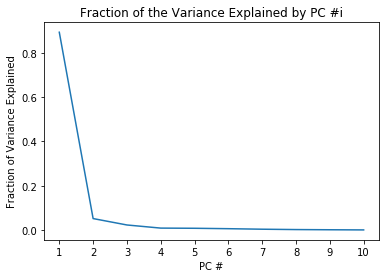

In [53]:
#SCREE plot (shows the variance explained by all principal components)

plt.plot(np.arange(pc_tot.shape[1]) +1, s**2/sum(s**2));
plt.title('Fraction of the Variance Explained by PC #i')
plt.xlabel('PC #')
plt.ylabel('Fraction of Variance Explained')
plt.xticks(np.arange(pc_tot.shape[1])+1)

# 3. Prediction Methods / 4. Cross Validation

We decided to first draw prediction methods on all the features together to predict the type of contraceptive used. We first used a linear regression, but shortly realized......... Then we used logistic regression and found it to be a good prediction method for our data. This address our question of exploring prediction methods to find the one that have a higher prediction accuracy score.

Brief Procedure Note: 
We splitted the test and training set, and set our repsonse variable as the contraceptive method.In the process of trying to run prediction methods on our data, we used the sklearn's one-hot encoding method to represent categorical data as binary vectors. 

Then we ran the logisitc regression on each of the 9 different features to predict the contraceptive type to see which feature(s) are most helpful.

Conclusion: The multiclass logistic regression gave a better model than a linear regression model. The testing accuracy for the multiclass logistic regression model was 0.559. 

Using the multiclass logistic model, we determined the prediction accuracy scores for each of the 9 features separately. Based on our outputs, the two features that gave the highest accuracy score was wife's education and wife's religion. 

In [13]:
#Spliting test and training data

train_c, test_c = train_test_split(contraceptive_ori, test_size= 0.20, random_state = 100)

y_trainc = train_c['contraceptive']
x_trainc = train_c.drop("contraceptive",axis = 1)

y_testc = test_c['contraceptive']
x_testc = test_c.drop('contraceptive',axis = 1)

In [20]:
### Data Transformation motivated by EDA
    #One Hot Encoding (in order to use categorical variables as features)

onehot_enc = OneHotEncoder()

#the categorical variables in the dataframe (excluding our response variable - contraceptive)
contra_cate = contraceptive_ori[['wife_education','husband_education','wife_religion',
                                  'wife_work','husband_occupation','standard_living',
                                   'media_exposure']]          
onehot_all_cate = onehot_enc.fit_transform(contra_cate).todense()

#to get the names of the new one hot encoded columns
#onehot_enc1.get_feature_names()

onehot_all = pd.DataFrame(onehot_all_cate)
onehot_all


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1470,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1471,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
### Create a design matrix (function)
    # ^ the function will turn the inputed data and return a dataframe that will have 
        #standard units for the numerical variables and onehot encoded data for the 
        #categorical variables
    

num_variable = ['wife_age', 'num_child']
cate_variable = ['wife_education','husband_education','wife_religion',
                                  'wife_work','husband_occupation','standard_living',
                                   'media_exposure']
scaler = StandardScaler()
scaler.fit(x_trainc[num_variable])
onehot_enc1 = OneHotEncoder()


def design_matrix(t):
    """Create a design matrix from contraceptive dataframe t"""
    onehot_enc1 = OneHotEncoder()
    scaled = t[num_variable].copy()
    scaled.iloc[:,:] = scaler.transform(scaled) #convert to standard units
    categoricals = onehot_enc1.fit_transform(t[cate_variable]).todense()
    categoricals2 = pd.DataFrame(categoricals)
    scaled.reset_index(drop = True, inplace= True)
    categoricals2.reset_index(drop = True, inplace= True)
    return pd.concat([scaled,categoricals2], axis = 1)

#for example:
design_matrix(x_trainc)


,wife_age,num_child,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,-0.780369,-0.537303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.437052,0.310010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.536885,-0.113646,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.680537,0.310010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.902112,-0.960959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,0.071826,1.580979,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1174,0.193568,-0.960959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1175,-1.632565,-0.537303,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1176,0.680537,-0.960959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [37]:
#function to one hot encode a given dataframe

def one_hot_encode(t):
    """Given a dataframe, one hot encode the values"""
    col_len = len(t.columns)
    columns = t.columns[:col_len]
    categoricals = onehot_enc1.fit_transform(t[columns]).todense()
    categoricals2 = pd.DataFrame(categoricals)
    return categoricals2

In [38]:
#linear regression

model_linreg = LinearRegression()
model_linreg.fit(design_matrix(x_trainc), y_trainc)

training_accu_linreg = model_linreg.score(design_matrix(x_trainc),y_trainc)
training_accu_linreg #0.1364976188719591

0.1364976188719591

In [39]:
#See Test accuracy using linear regression

model_linreg_test = LinearRegression()
model_linreg_test.fit(design_matrix(x_testc), y_testc)

test_accu_linreg = model_linreg_test.score(design_matrix(x_testc),y_testc)
test_accu_linreg #0.1319690251613218


0.1319690251613218

In [40]:
#Multiclass Logistic Regression

model_log = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs')
model_log.fit(design_matrix(x_trainc), y_trainc)

y_hat_log = model_log.predict(design_matrix(x_trainc))
prediction_acc_log = np.mean(y_trainc == y_hat_log)
prediction_acc_log #0.5271646859083192

0.5271646859083192

In [41]:
#Test accuracy using multiclass logistic regression

model_log_test = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs')
model_log_test.fit(design_matrix(x_testc), y_testc)

y_hat_log_test = model_log_test.predict(design_matrix(x_testc))
prediction_acc_log_test = np.mean(y_testc == y_hat_log_test)
prediction_acc_log_test #0.559322033898305

0.559322033898305

In [42]:
#1) Wife's Age
x_train_wife_age = x_trainc[['wife_age']]

logmodel_wife_age = LogisticRegression()
logmodel_wife_age.fit(x_train_wife_age, y_trainc)

#y_hat_wife_age = logmodel_wife_age.predict(x_train_wife_age)
#pred_acc_wife_age = np.mean(y_trainc == y_hat_wife_age)
#pred_acc_wife_age #0.4202037351443124


pred_acc_wife_age = logmodel_wife_age.score(x_train_wife_age, y_trainc)
pred_acc_wife_age #0.4202037351443124

0.4202037351443124

In [43]:
#2) Wife's Education level

wife_edu_xtrain = one_hot_encode(x_trainc[['wife_education']])

logmodel_wife_edu = LogisticRegression()
logmodel_wife_edu.fit(wife_edu_xtrain, y_trainc)

pred_acc_wife_edu = logmodel_wife_edu.score(wife_edu_xtrain, y_trainc)
pred_acc_wife_edu #0.44906621392190155

0.44906621392190155

In [44]:
#3) Husband's Education level

hus_edu_xtrain = one_hot_encode(x_trainc[['husband_education']])

logmodel_hus_edu = LogisticRegression()
logmodel_hus_edu.fit(hus_edu_xtrain, y_trainc)

pred_acc_hus_edu = logmodel_hus_edu.score(hus_edu_xtrain, y_trainc)
pred_acc_hus_edu #0.42614601018675724


0.42614601018675724

In [45]:
#4) Number of Children

x_train_child = x_trainc[['num_child']]

logmodel_wife_child = LogisticRegression()
logmodel_wife_child.fit(x_train_child, y_trainc)


pred_acc_child = logmodel_wife_child.score(x_train_child, y_trainc)
pred_acc_child #0.39473684210526316


0.39473684210526316

In [46]:
#5) Wife's Religion

religion_xtrain = one_hot_encode(x_trainc[['wife_religion']])

logmodel_religion = LogisticRegression()
logmodel_religion.fit(religion_xtrain, y_trainc)

pred_acc_religion = logmodel_religion.score(religion_xtrain, y_trainc)
pred_acc_religion #0.43208828522920206

0.43208828522920206

In [47]:
#6) Wife now woring?

wife_working_xtrain = one_hot_encode(x_trainc[['wife_work']])

logmodel_wife_wrok = LogisticRegression()
logmodel_wife_wrok.fit(wife_working_xtrain, y_trainc)

pred_acc_wife_work = logmodel_wife_wrok.score(wife_working_xtrain, y_trainc)
pred_acc_wife_work #0.42614601018675724


0.42614601018675724

In [48]:
#7) Husband's Occupation

hus_occ_xtrain = one_hot_encode(x_trainc[['husband_occupation']])

logmodel_hus_occ = LogisticRegression()
logmodel_hus_occ.fit(hus_occ_xtrain, y_trainc)

pred_acc_hus_occ = logmodel_hus_edu.score(hus_occ_xtrain, y_trainc)
pred_acc_hus_occ #0.42699490662139217

0.42614601018675724

In [49]:
#8) Standard of living index

st_living_xtrain = one_hot_encode(x_trainc[['standard_living']])

logmodel_st_living = LogisticRegression()
logmodel_st_living.fit(st_living_xtrain, y_trainc)

pred_acc_st_living = logmodel_st_living.score(st_living_xtrain, y_trainc)
pred_acc_st_living #0.42614601018675724

0.42614601018675724

In [50]:
#9) Media Exposure 

media_xtrain = one_hot_encode(x_trainc[['media_exposure']])

logmodel_media = LogisticRegression()
logmodel_media.fit(media_xtrain, y_trainc)

pred_acc_hus_media = logmodel_media.score(media_xtrain, y_trainc)
pred_acc_hus_media #0.42614601018675724

0.42614601018675724

In [51]:
#Multiclass Logistic Regression just using the two numerical variables

model_log2 = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs')
scaled_log2 = x_trainc[['wife_age', 'num_child']]
scaled_log2.iloc[:,:] = scaler.transform(scaled_log2)

model_log2.fit(scaled_log2, y_trainc)

y_hat_log2 = model_log2.predict(scaled_log2)
prediction_acc_log2 = np.mean(y_trainc == y_hat_log2)
prediction_acc_log2 #0.48896434634974534

/srv/conda/envs/data100/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.48896434634974534